### ANALISIS INICIAL DEL DATASET

Carga de datos e imports de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'datasets/dataset_unificado_mercadona.csv'  
dataset = pd.read_csv(file_path)

Reviso datos faltantes

In [2]:
print("Valores nulos por columna:")
print(dataset.isnull().sum())

Valores nulos por columna:
id                 0
supermarket        0
category           0
name               0
price              0
reference_price    0
reference_unit     0
insert_date        0
PIBFecha           0
dtype: int64


Revisamos si existen valores negativos en 'price'

In [21]:
negative_prices = dataset[dataset['price'] < 0]

print(f"Cantidad de valores negativos en 'price': {len(negative_prices)}")


Cantidad de valores negativos en 'price': 0


Convertimos 'insert_date' al tipo datetime para para poder analizarlas y trabajar con ellas correctamente.

In [3]:
dataset['insert_date'] = pd.to_datetime(dataset['insert_date'])
print(f"Tipo de dato de 'insert_date': {dataset['insert_date'].dtype}")


Tipo de dato de 'insert_date': datetime64[ns]


Vemos estadísticas descriptivas de las columnas numéricas, esto da una idea general de los valores mínimos, máximos, medios y posibles outliers.

In [4]:
print("\nEstadísticas descriptivas:")
print(dataset[['price', 'reference_price', 'PIBFecha']].describe())


Estadísticas descriptivas:
               price  reference_price      PIBFecha
count  761102.000000    761102.000000  7.611020e+05
mean        6.265762         6.946805  2.876320e+02
std        67.922137        12.292162  3.979042e-13
min         0.100000         0.010000  2.876320e+02
25%         1.210000         1.630000  2.876320e+02
50%         1.980000         3.980000  2.876320e+02
75%         3.740000         8.000000  2.876320e+02
max      2470.050000       432.430000  2.876320e+02


Visualizamos la distribución de 'price<<100'a traves de histogramas para identificar tendencias generales y posibles valores atípicos.

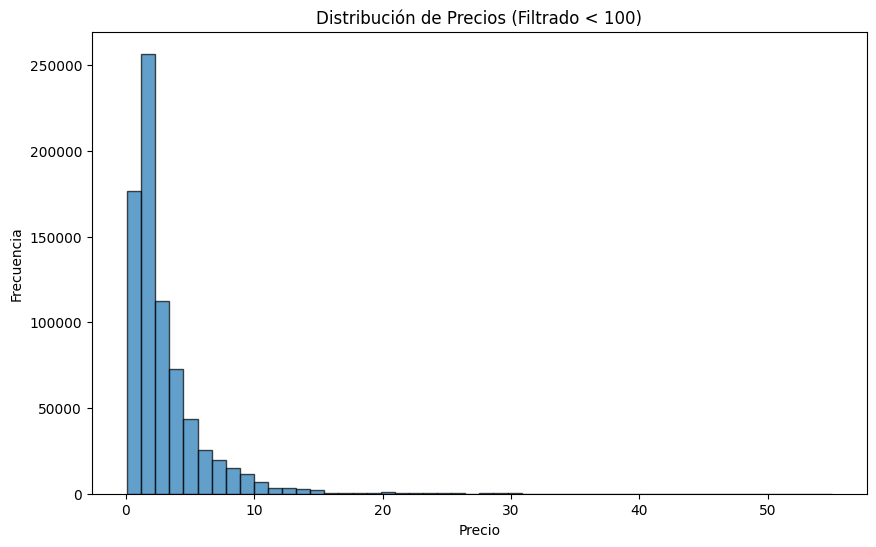

In [6]:
filtered_prices = dataset[dataset['price'] < 100]

# Histograma con el rango filtrado
plt.figure(figsize=(10, 6))
plt.hist(filtered_prices['price'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución de Precios (Filtrado < 100)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Visualizamos la distribución de 'reference_price<100'


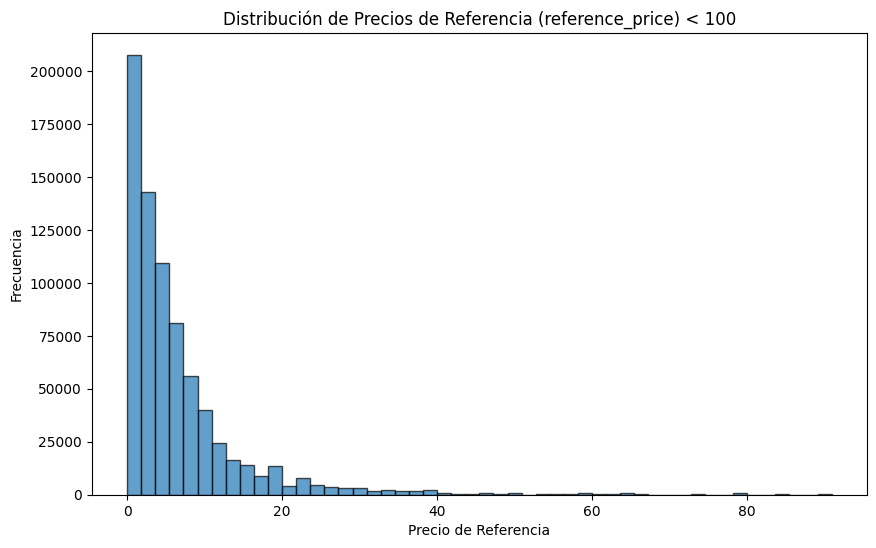

In [10]:
filtered_reference_price = dataset[dataset['reference_price'] < 100]


plt.figure(figsize=(10, 6))
plt.hist(filtered_reference_price['reference_price'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución de Precios de Referencia (reference_price) < 100')
plt.xlabel('Precio de Referencia')
plt.ylabel('Frecuencia')
plt.show()

Revisamos las categorías únicas de 'category' y 'reference_unit'


In [12]:
print("\nCategorías únicas en 'category':")
print(dataset['category'].unique())

print("\nUnidades únicas en 'reference_unit':")
print(dataset['reference_unit'].unique())


Categorías únicas en 'category':
['fruta' 'lechuga_y_ensalada_preparada' 'verdura' 'pescado_fresco'
 'marisco' 'pescado_en_bandeja' 'pescado_congelado' 'salazones_y_ahumados'
 'cerdo' 'aves_y_pollo' 'vacuno' 'conejo_y_cordero' 'embutido'
 'hamburguesas_y_picadas' 'empanados_y_elaborados' 'golosinas' 'arreglos'
 'carne_congelada' 'aves_y_jamon_cocido' 'chopped_y_mortadela'
 'jamon_serrano' 'embutido_curado' 'bacon_y_salchichas'
 'queso_untable_y_fresco' 'queso_curado_semicurado_y_tierno'
 'queso_lonchas_rallado_y_en_porciones' 'especias' 'pate_y_sobrasada'
 'pan_de_horno' 'pan_de_molde_y_otras_especialidades'
 'pan_tostado_y_rallado' 'picos_rosquilletas_y_picatostes'
 'bolleria_de_horno' 'bolleria_envasada' 'tartas_y_pasteles'
 'harina_y_preparado_reposteria' 'velas_y_decoracion'
 'leche_y_bebidas_vegetales' 'mantequilla_y_margarina' 'huevos' 'cereales'
 'tortitas' 'galletas' 'cafe_capsula_y_monodosis' 'cafe_molido_y_en_grano'
 'cafe_soluble_y_otras_bebidas' 'cacao_soluble_y_chocolate_

Los valores únicos incluyen kg, ud, 100 g, L, entre otros. Esto será útil para estandarizar las unidades si es necesario.

Ahora vamos a detectar Outliers, para ello utilizamos el metodo del rango intercuartil (IQR)
El IQR (Interquartile Range) mide el rango entre el primer cuartil (Q1, 25%) y el tercer cuartil (Q3, 75%). Los valores considerados outliers son aquellos que están fuera del rango

Calculamos el IQR para la columna 'price'

In [13]:
Q1 = dataset['price'].quantile(0.25)  # Primer cuartil
Q3 = dataset['price'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartil

Definimos los limites inferior y superior para no considerar outliers

In [17]:
lower_bound = Q1 - 1.5 * IQR
if (lower_bound < 0) :
    lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

print(f"Rango intercuartil (IQR): {IQR}")
print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")

Rango intercuartil (IQR): 2.5300000000000002
Límite inferior: 0
Límite superior: 7.535


Filtramos el dataset eliminando los outliers

In [18]:
filtered_dataset = dataset[(dataset['price'] >= lower_bound) & (dataset['price'] <= upper_bound)]

print(f"Registros originales: {len(dataset)}")
print(f"Registros sin outliers: {len(filtered_dataset)}")

Registros originales: 761102
Registros sin outliers: 705543


Visualizamos la nueva distribución de precios sin outliers


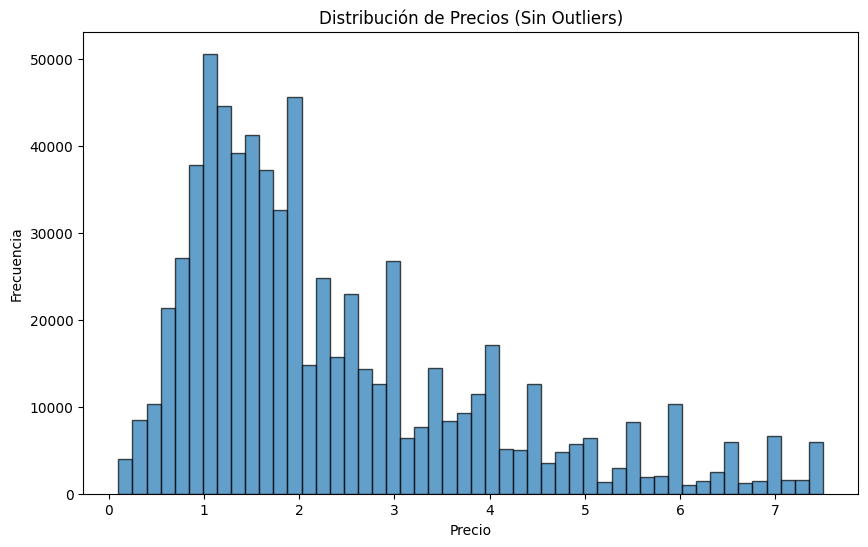

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_dataset['price'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución de Precios (Sin Outliers)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Ahora vamos a analizar las categorias 

In [ ]:
print(f"Cantidad de categorías únicas: {dataset['category'].nunique()}")
print("\nEjemplos de categorías únicas:")
print(dataset['category'].unique()) 

Cantidad de categorías únicas: 150

Ejemplos de categorías únicas:
<bound method Series.unique of 0                     fruta
1                     fruta
2                     fruta
3                     fruta
4                     fruta
                ...        
761097    perfume_y_colonia
761098    perfume_y_colonia
761099    perfume_y_colonia
761100    perfume_y_colonia
761101    perfume_y_colonia
Name: category, Length: 761102, dtype: object>
